In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn import ensemble

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Чтение CSV файла в DataFrame
df = pd.read_csv('Fraud.csv')

In [ ]:
display(df)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
504306,20,PAYMENT,92.66,C1633479877,5018.00,4925.34,M335802102,0.00,0.0,0.0,0.0
504307,20,PAYMENT,441.01,C1476748671,668.00,226.99,M67151423,0.00,0.0,0.0,0.0
504308,20,PAYMENT,11699.28,C45893822,226.99,0.00,M163799617,0.00,0.0,0.0,0.0
504309,20,PAYMENT,11108.29,C2057228443,0.00,0.00,M2066657449,0.00,0.0,0.0,0.0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504310 entries, 0 to 504309
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            504310 non-null  int64  
 1   type            504310 non-null  object 
 2   amount          504310 non-null  float64
 3   nameOrig        504310 non-null  object 
 4   oldbalanceOrg   504310 non-null  float64
 5   newbalanceOrig  504310 non-null  float64
 6   nameDest        504310 non-null  object 
 7   oldbalanceDest  504310 non-null  float64
 8   newbalanceDest  504310 non-null  float64
 9   isFraud         504310 non-null  float64
 10  isFlaggedFraud  504310 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 46.2+ MB


In [ ]:
round(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest',]].describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
step,504310.0,13.959,3.758,1.0,11.00,14.000,17.000,20.00
amount,504310.0,165981.306,272015.536,0.1,13303.37,81114.355,222080.418,10000000.00
oldbalanceOrg,504310.0,910909.046,3011554.899,0.0,0.00,18600.500,170094.070,38939424.03
newbalanceOrig,504310.0,930710.863,3048699.846,0.0,0.00,0.000,210027.393,38946233.02
oldbalanceDest,504310.0,982149.532,2334875.375,0.0,0.00,119140.770,895827.510,41482697.12
newbalanceDest,504310.0,1161062.887,2508203.221,0.0,0.00,221288.290,1199396.865,41482697.12


Доля мошеннических транзакций: 0.0004620174099264341


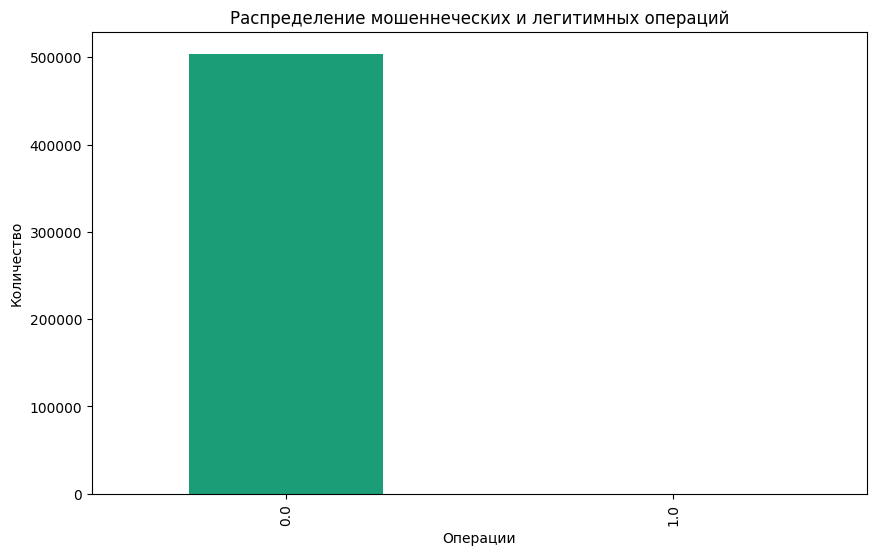

In [ ]:
# Доля мошеннеческих операций
print('Доля мошеннических транзакций:', df['isFraud'].mean())

# Количество мошеннических и легетимных операций
plt.figure(figsize=(10, 6))
df['isFraud'].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Распределение мошеннеческих и легитимных операций')
plt.xlabel('Операции')
plt.ylabel('Количество')
plt.show()

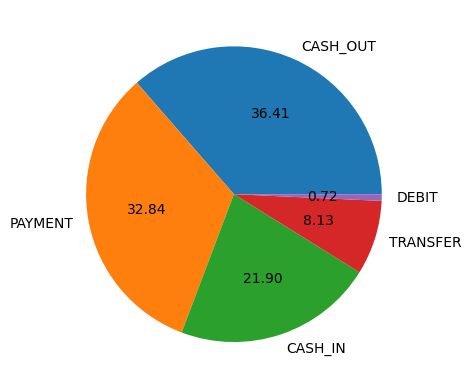

In [ ]:
# Количество операций по типам
plt.pie(x = df['type'].value_counts(), autopct = '%.2f', labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()


In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,504077
1.0,233


                df      sum_sq   mean_sq           F         PR(>F)
C(type)        4.0    0.278046  0.069512  150.700157  4.589239e-129
Residual  504305.0  232.614304  0.000461         NaN            NaN


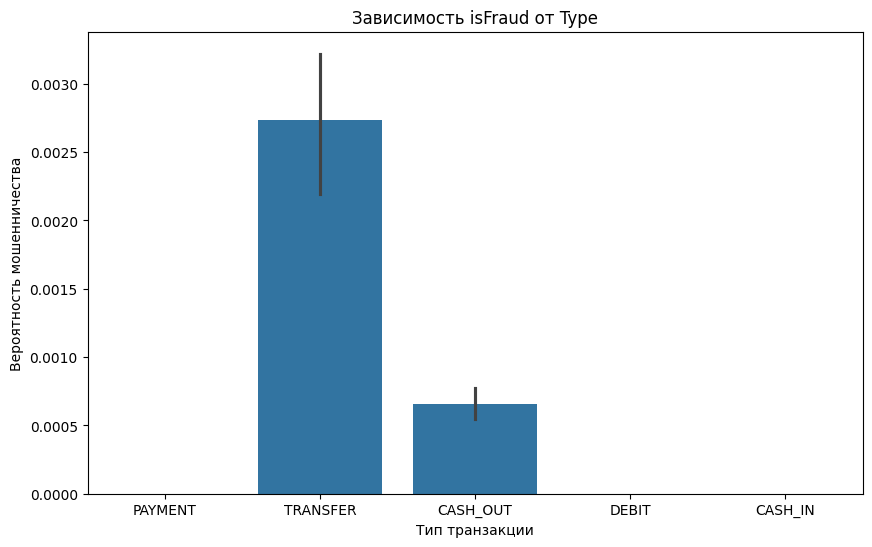

In [ ]:
# Анализ зависимости между Type и isFraud
model = ols('isFraud ~ C(type)', data=df).fit()
anova_results = anova_lm(model)
print(anova_results)

# Визуализация зависимости
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='isFraud', data=df)
plt.title('Зависимость isFraud от Type')
plt.xlabel('Тип транзакции')
plt.ylabel('Вероятность мошенничества')
plt.show()

In [ ]:
df['type'].value_counts()

,count
type,
CASH_OUT,183615
PAYMENT,165607
CASH_IN,110440
TRANSFER,40999
DEBIT,3649


**Как видим, все мошеннические операции связаны только с переводами и снятием наличных**

In [ ]:
df.loc[(df['type'] == 'CASH_OUT') & (df['isFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1.0,0.0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1.0,0.0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1.0,0.0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1.0,0.0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
479636,19,CASH_OUT,122101.57,C149845822,0.00,0.0,C1200316948,0.00,639940.20,1.0,0.0
480464,19,CASH_OUT,161939.36,C1993475473,161939.36,0.0,C1832323051,628935.02,851972.34,1.0,0.0
481251,19,CASH_OUT,10000000.00,C2050703310,10000000.00,0.0,C1622860679,504326.62,10342417.90,1.0,0.0
481253,19,CASH_OUT,1861008.32,C1718961034,1861008.32,0.0,C714051433,0.00,1789942.62,1.0,0.0


In [ ]:
df.loc[(df['type'] == 'TRANSFER') & (df['isFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1.0,0.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.0,0.0,1.0,0.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.0,0.0,1.0,0.0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.00,C431687661,0.0,0.0,1.0,0.0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.00,C1136419747,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
474966,19,TRANSFER,3477438.49,C767243506,3477438.49,0.00,C1532877354,0.0,0.0,1.0,0.0
480463,19,TRANSFER,161939.36,C263177591,161939.36,0.00,C94435408,0.0,0.0,1.0,0.0
481250,19,TRANSFER,10000000.00,C416779475,11861008.32,1861008.32,C380259496,0.0,0.0,1.0,0.0
481252,19,TRANSFER,1861008.32,C1990303942,1861008.32,0.00,C1308678191,0.0,0.0,1.0,0.0


In [ ]:
df['nameOrig'].value_counts()

,count
nameOrig,
C1709295811,2
C1647276567,2
C133857826,2
C1999539787,2
C199116739,2
...,...
C1404265989,1
C708453950,1
C1089550397,1


**Каждое значение в столбце nameOrig уникально**

In [ ]:
df['nameDest'].value_counts()

,count
nameDest,
C985934102,91
C248609774,87
C1286084959,87
C665576141,83
C2083562754,82
...,...
M814827615,1
M2141756002,1
M985561185,1


<Figure size 800x600 with 0 Axes>

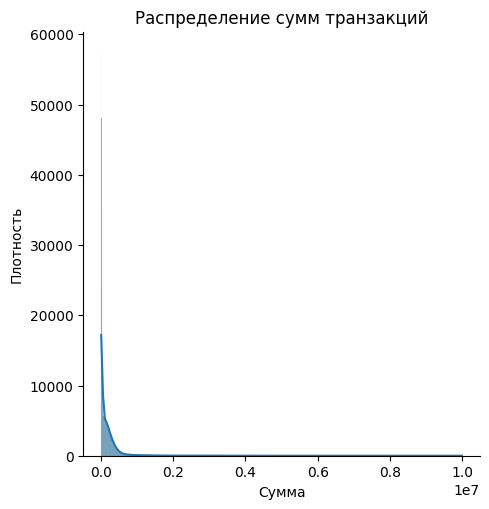

In [ ]:
plt.figure(figsize=(8, 6))
sns.displot(df['amount'], kde=True)
plt.title('Распределение сумм транзакций')
plt.xlabel('Сумма')
plt.ylabel('Плотность')
plt.show()

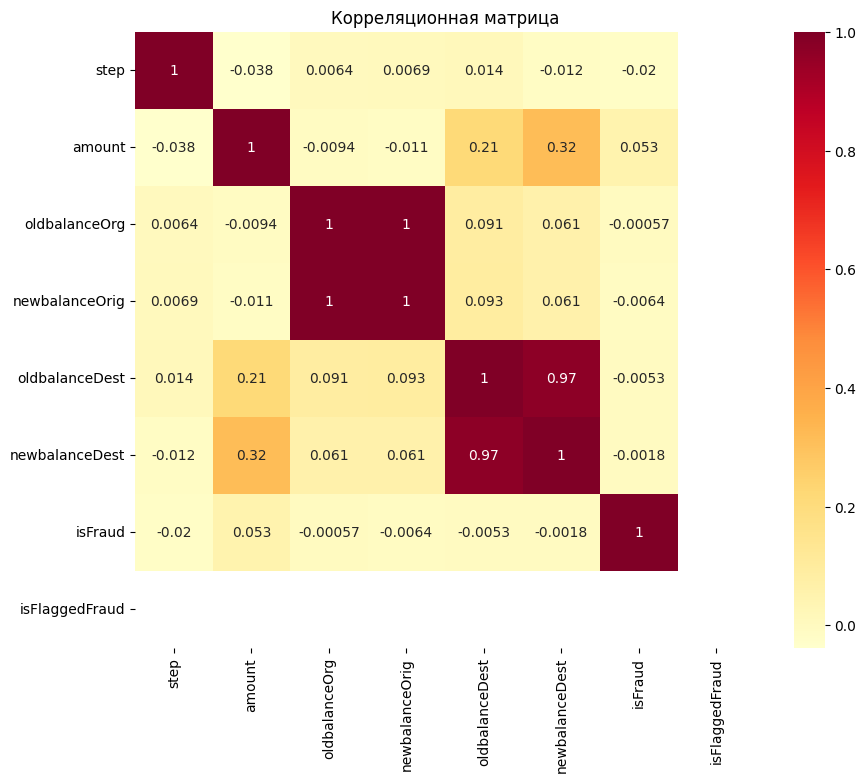

In [ ]:
# Корреляционный анализ
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица')
plt.show()

**Среди численных данных наибольшая зависимость типа операции по критерию мошенничества (isFraud) наблюдается от суммы операции (amount)**


In [ ]:
df=df.drop({'nameOrig','nameDest'},axis=1)

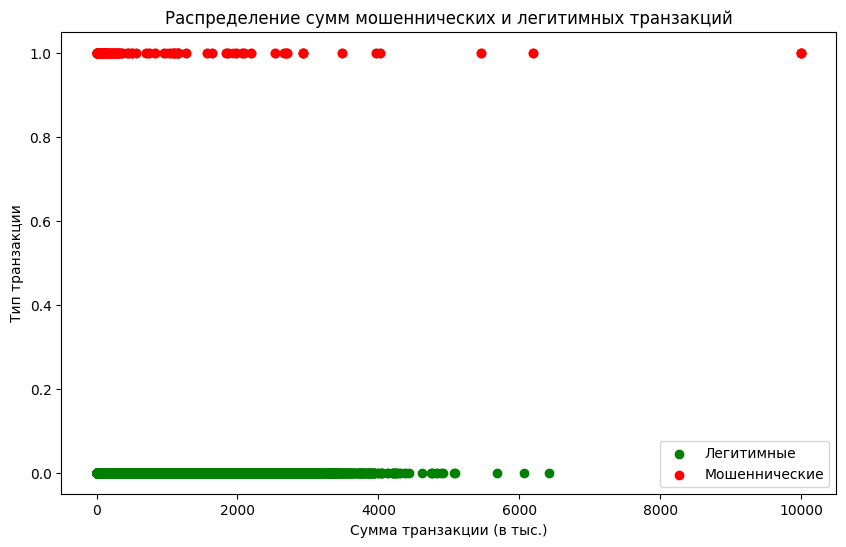

In [ ]:
plt.figure(figsize=(10, 6))
df_legit = df[df['isFraud'] == 0]
df_fraud = df[df['isFraud'] == 1]
plt.scatter(df_legit['amount'] / 1000, df_legit['isFraud'], c='green', label='Легитимные')
plt.scatter(df_fraud['amount'] / 1000, df_fraud['isFraud'], c='red', label='Мошеннические')
plt.xlabel('Сумма транзакции (в тыс.)')
plt.ylabel('Тип транзакции')
plt.title('Распределение сумм мошеннических и легитимных транзакций')
plt.legend()

In [ ]:
df=df.drop({'newbalanceDest','newbalanceOrig'},axis=1)
display(df)

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,21249.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,181.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,181.00,21182.00,1.0,0.0
4,1,PAYMENT,11668.14,41554.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...
504305,20,TRANSFER,267797.78,0.00,845320.62,0.0,0.0
504306,20,PAYMENT,92.66,5018.00,0.00,0.0,0.0
504307,20,PAYMENT,441.01,668.00,0.00,0.0,0.0
504308,20,PAYMENT,11699.28,226.99,0.00,0.0,0.0


In [ ]:
column_names = ['type']
for i in column_names:
  df[i] = pd.factorize(df[i])[0]

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,170136.0,0.0,0.0,0.0
1,1,0,1864.28,21249.0,0.0,0.0,0.0
2,1,1,181.00,181.0,0.0,1.0,0.0
3,1,2,181.00,181.0,21182.0,1.0,0.0
4,1,0,11668.14,41554.0,0.0,0.0,0.0


<Axes: >

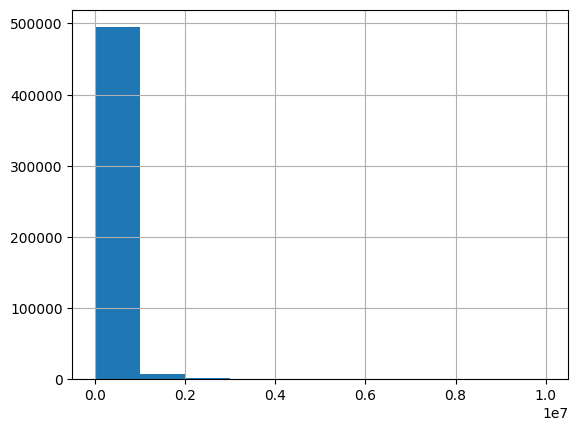

In [ ]:
df['amount'].hist()

In [ ]:
fraud = df[df['isFraud'] == 1]
safe = df[df['isFraud'] == 0]

(501498, 7)


<Axes: >

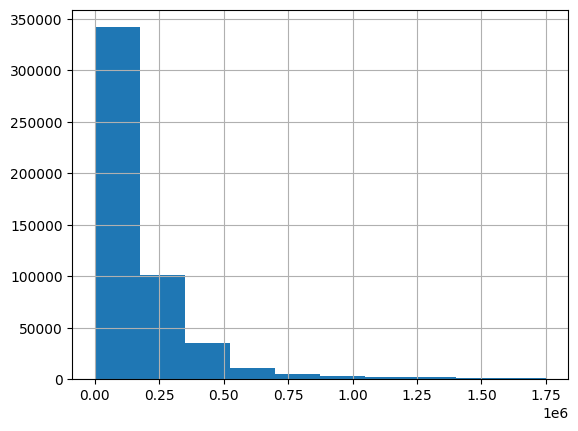

In [ ]:
df = df[df['amount'] < 1.75e6] # оставим только те строки, где значение цены меньше 8 000 000
print(df.shape) # выведем размер отфильтрованного дата сета (кол-во строк, кол-во столбцов), как видим, количество строк сократится
df['amount'].hist() # построим диаграмму

In [ ]:
print(safe.shape)
print(fraud.shape)

(504077, 7)
(233, 7)


In [ ]:
safe=safe.sample(n=233)

In [ ]:
print(safe.shape)
print(fraud.shape)

(233, 7)
(233, 7)


In [ ]:
up_df=pd.concat([safe,fraud], axis=0)

In [ ]:
up_df.shape

(466, 7)

In [ ]:
y = up_df['isFraud']
X = up_df.drop(['isFraud'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(372, 6) (94, 6) (372,) (94,)


In [ ]:
y_test.value_counts()

,count
isFraud,
0.0,47
1.0,47


In [ ]:
y_train.value_counts()

,count
isFraud,
0.0,186
1.0,186


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [ ]:
df = pd.DataFrame(X_train_scaled)
df.to_csv('x_train.csv', index=False)

df = pd.DataFrame(X_test_scaled)
df.to_csv('x_test.csv', index=False)

df = pd.DataFrame(y_train)
df.to_csv('y_train.csv', index=False)

df = pd.DataFrame(y_test)
df.to_csv('y_test.csv', index=False)

In [47]:
model_metrics = []

Случайный лес:

In [48]:
rf_model = ensemble.RandomForestClassifier(n_estimators=150)
rf_model.fit(X_train_scaled, y_train)
test_predict_rf = rf_model.predict(X_test_scaled)
print(accuracy_score(y_test, test_predict_rf))
print(recall_score(y_test, test_predict_rf))
print(precision_score(y_test, test_predict_rf))
print(f1_score(y_test, test_predict_rf))

Accuracy = accuracy_score(y_test, test_predict_rf),
Precision = precision_score(y_test, test_predict_rf),
Recall = recall_score(y_test, test_predict_rf),
F1 = f1_score(y_test, test_predict_rf)

model_metrics.append({
        'Model': "Random Forest",
        'Accuracy': Accuracy,
        'Precision': Precision,
        'Recall': Recall,
        'F1-score': F1
    })

0.9680851063829787
1.0
0.94
0.9690721649484536


Логистическая регрессия

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
test_predict = model.predict(X_test_scaled)
print(accuracy_score(y_test, test_predict))
print(recall_score(y_test, test_predict))
print(precision_score(y_test, test_predict))
print(f1_score(y_test, test_predict))

Accuracy2 = accuracy_score(y_test, test_predict),
Precision2 = precision_score(y_test, test_predict),
Recall2 = recall_score(y_test, test_predict),
F12 = f1_score(y_test, test_predict)

model_metrics.append({
        'Model': "Logistic Regression",
        'Accuracy': Accuracy2,
        'Precision': Precision2,
        'Recall': Recall2,
        'F1-score': F12
    })

0.7872340425531915
0.7446808510638298
0.813953488372093
0.7777777777777778


Дерево решений:

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
test_pred = model.predict(X_test_scaled)

print(accuracy_score(y_test, test_pred))
print(recall_score(y_test, test_pred))
print(precision_score(y_test, test_pred))
print(f1_score(y_test, test_pred))

Accuracy3 = accuracy_score(y_test, test_pred),
Precision3 = precision_score(y_test, test_pred),
Recall3 = recall_score(y_test, test_pred),
F13 = f1_score(y_test, test_pred)

model_metrics.append({
        'Model': "Decision Tree",
        'Accuracy': Accuracy3,
        'Precision': Precision3,
        'Recall': Recall3,
        'F1-score': F13
    })

0.9361702127659575
0.9361702127659575
0.9361702127659575
0.9361702127659575


Гауссовский наивный байесовский классификатор:


In [51]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train_scaled, y_train)

y_pred = gaussian.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

Accuracy4 = accuracy_score(y_test, y_pred),
Precision4 = precision_score(y_test, y_pred),
Recall4 = recall_score(y_test, y_pred),
F14 = f1_score(y_test, y_pred)

model_metrics.append({
        'Model': "GaussianNB",
        'Accuracy': Accuracy4,
        'Precision': Precision4,
        'Recall': Recall4,
        'F1-score': F14
    })

0.8404255319148937
0.7021276595744681
0.9705882352941176
0.8148148148148149


Бернуллиевский наивный байесовский классификатор:



In [52]:
from sklearn.naive_bayes import BernoulliNB

bernoulli = BernoulliNB()
bernoulli.fit(X_train_scaled, y_train)
y_pred = bernoulli.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

Accuracy5 = accuracy_score(y_test, y_pred),
Precision5 = precision_score(y_test, y_pred),
Recall5 = recall_score(y_test, y_pred),
F15 = f1_score(y_test, y_pred)

model_metrics.append({
        'Model': "BernoulliNB",
        'Accuracy': Accuracy5,
        'Precision': Precision5,
        'Recall': Recall5,
        'F1-score': F15
    })

0.7553191489361702
0.851063829787234
0.7142857142857143
0.7766990291262136


In [53]:
metrics_df = pd.DataFrame(model_metrics)
display(metrics_df)

,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,"(0.9680851063829787,)","(0.94,)","(1.0,)",0.969072
1,Logistic Regression,"(0.7872340425531915,)","(0.813953488372093,)","(0.7446808510638298,)",0.777778
2,Decision Tree,"(0.9361702127659575,)","(0.9361702127659575,)","(0.9361702127659575,)",0.936170
3,GaussianNB,"(0.8404255319148937,)","(0.9705882352941176,)","(0.7021276595744681,)",0.814815
4,BernoulliNB,"(0.7553191489361702,)","(0.7142857142857143,)","(0.851063829787234,)",0.776699
